Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2613 - Inteligencia Artificial <br>
<br>

---
<center>
    <h1> Ayudantía 8: Intro a ML, uso de pandas, numpy, y sklearn </h1>
    <h3>
        Ayudantes: Juan José Alonso y Martín José Vial<br>
        Segundo Semestre 2024<br>    
        11 de octubre de 2024
    </h3>
    <img src="https://www.researchgate.net/profile/Laura-Tomppo/publication/339324757/figure/fig1/AS:859809322651649@1582005925753/Principles-of-the-machine-learning-methods-a-decision-tree-b-KNN-classifier-and-c.png" scale=0.5>
    <br>
</center>

<br>

---


### En este notebook, encuentras los modelos KNN, DecisionTreeClassifier, RandomForestClassifier y SVM para el dataset Titanic

### 1 Importar las librerías necesarias

In [ ]:
# Liberías para manejar los datos
import pandas as pd
import seaborn as sns # librería para obtener el conjunto de datos que usaremos
from sklearn.model_selection import train_test_split

# Libería para graficar
import matplotlib.pyplot as plt

# Libería para calcular las métricas de los modelos
from sklearn.metrics import classification_report, accuracy_score

# Libería para obtener la matriz de confusión
from sklearn.metrics import confusion_matrix

# Librería para usar KNN
from sklearn.neighbors import KNeighborsClassifier

### 2 Cargar el conjunto de datos

Vamos a usar un dataset que viene precargado en la librería sns. Este es un buen conjunto de datos para hacer pruebas rápidas.

In [ ]:
titanic = sns.load_dataset('titanic') # la función load_dataset viene en la librería sns
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3 Preprocesamiento de los datos

In [ ]:
# Imputar valores faltantes
titanic['age'].fillna(titanic['age'].median(), inplace=True) # .fillna es una función de pandas
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Codificar variables categóricas
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1}) # re escribimos la columna sex
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2}) # las letras son la inicial de la ciudad de embarque

# Seleccionar características y la variable objetivo
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived' # queremos predecir si sobrevivirán

X = titanic[features]
y = titanic[target]


Por último, dividimos los datos en los sets de Train y Tets. En este ejemplo no usaremos el set de validación.

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train_test_split es una función de sklearn para dividir el set de datos en el conjunto de entranamiento y el conjunto de prueba

### 4 Clasificación con KNN

Accuracy: 0.6983240223463687
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       105
           1       0.65      0.58      0.61        74

    accuracy                           0.70       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



<Axes: >

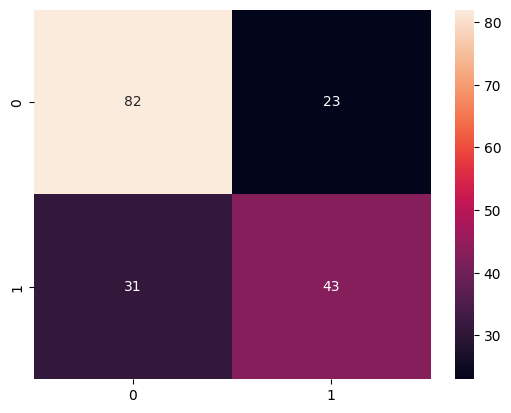

In [ ]:
# Primero instanciamos al clasificador
neigh = KNeighborsClassifier(n_neighbors=1)

# "Entrenamos" al clasificador
neigh.fit(X_train, y_train)

# Obtenemos las predicciones
y_pred = neigh.predict(X_test)


# Evaluación, las funciones accuracy_score y classification_report son parte de sklearn
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Mostramos la matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
# recordando que la variable a predecir es sobrevive o no y toma los valores 1 ó 0 respectivamente.

Las filas corresponden a las clases reales, y las columnas corresponden a las clases predichas. ¿Qué representaría el cuadrante (0,1)? ¿Y el (0,0)?

Probemos con otros número de vecinos

In [ ]:
number_of_n_neighbors = [1, 3, 4, 5, 7, 9, 11]

for n_neighbors in number_of_n_neighbors:
  # Primero instanciamos al clasificador
  neigh = KNeighborsClassifier(n_neighbors=n_neighbors)

  # "Entrenamos" al clasificador
  neigh.fit(X_train, y_train)

  # Obtenemos las predicciones
  y_pred = neigh.predict(X_test)

  # Evaluación, las funciones accuracy_score y classification_report son parte de sklearn
  print(f"Accuracy usando {n_neighbors} vecinos:", accuracy_score(y_test, y_pred))
  # recordando que la variable a predecir es sobrevive o no y toma los valores 1 ó 0 respectivamente.

Accuracy usando 1 vecinos: 0.6983240223463687
Accuracy usando 3 vecinos: 0.7150837988826816
Accuracy usando 4 vecinos: 0.7262569832402235
Accuracy usando 5 vecinos: 0.7039106145251397
Accuracy usando 7 vecinos: 0.7262569832402235
Accuracy usando 9 vecinos: 0.7206703910614525
Accuracy usando 11 vecinos: 0.7374301675977654
